In [1]:
# imports
# import modules
import io
import math
import numpy
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# setting up directory paths
working_dir = Path('/Users/migineishvilin2/Documents/urfp_project')
data_dir = working_dir.joinpath('data')
anal_dir = working_dir.joinpath('analysis_notebooks')

# setting up file paths
data_file = data_dir.joinpath('raw_data.csv')

Number of Rows: 4953
Number of Columns: 304
4945 q2a1
4951 q2a2
4949 q2a3
4943 q3a1
4950 q3a2
4948 q3a3
4952 q17d1
4951 q18c1
4925 q18d
4952 q18j
4951 q18k
4948 q18l
4952 q19a8
4951 g4b1
4952 q21b1
4951 q21c1
27 cid
4953 sjsid
2309 q2a1
2372 q2a2
2174 q2a3
2064 q3a1
2018 q3a2
1804 q3a3
476 q12a1
360 q12a2
488 q12b1
535 q12b2
64 q15d
214 q17d1
95 q18a6
152 q18c1
1353 q18d
176 q18e7
71 q18g
2187 Zip
2313 q18h
130 q18i1
394 q18j
439 q18k
473 q18l
1397 q19a8
22 g4b1
71 q21b1
87 q21c1
20 q22e9
23 q23a2
22 q23a4
227 q23b1
1936 zcta
914 postoff
356 county
51 st
50 state
50 statefips
405 staco
1423 sqmi
1862 zpop09
1877 zpop09sqmi
1853 zpop10
1843 zwhite10
1681 zblack10
747 zamind10
1518 zasianpi10
1817 zmale10
1834 zfemale10
1855 znothisp10
1738 zhisp10
240 cbsa
239 cbsaname
79 csa
79 csaname
404 popden
404 logpd
29 r_q2a1
29 r_q2a2
29 r_q2a3
29 r_q3a1
29 r_q3a2
29 r_q3a3
22 q5scale
22 q6scale
25 q7scale
56 q8scale
53 q9scale
55 q10scale
32 q11scale
50 q14scale
1361 Bminumber
70 Age
70 age18


/Users/migineishvilin2/Documents/urfp_project/analysis_notebooks/data_analysis.ipynb:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  "cell_type": "markdown",


416514


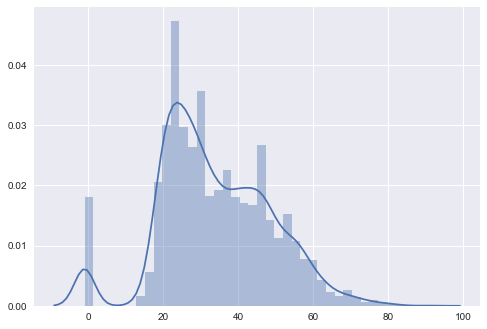

2301
2195
33.989583333333336
14.681924917082135
Stored 'df_map' (DataFrame)
2313


SyntaxError: unexpected EOF while parsing (<ipython-input-3-7e49296a571e>, line 3)

In [3]:
%run /Users/migineishvilin2/Documents/urfp_project/analysis_notebooks/data_analysis.ipynb

In [4]:
df_map.head()

,sjsid,q1a,q1b,q1c,q2a1,q2a2,q2a3,q2b,q3a1,q3a2,...,q22c,q22d1,q22d2,q22f,q23c,q24a,q24b,q24c,q24d,q25
0,10010157,1,7,7,Financial stability,My Grandmother's health,The financial stabilty of my extended family,1,Discrimination,Marriage rights,...,-1,-1,-1,0,1,4,4,4,4,4
1,10010120,1,1,2,job discrimination,housing discrimination,discrimination by law enforcement,3,job discrimination,housing discrimination,...,1,4,1,0,3,4,3,3,2,5
2,11020070,3,1,2,homosexual discrimination in india,employment non-discrimination,uafa + doma,1,enda,economic justice,...,0,0,0,0,1,2,2,2,2,3
3,11020117,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,making my community aware to LGBT south asians,2,they are almost invisible,their own communties don't accept them,...,1,3,0,0,1,2,3,3,3,4
4,11020144,1,1,6,police brutality,war and militarism,"economic injustice in terms of low pay, unaffo...",1,police brutality/criminalization,war and militarism,...,0,2,0,0,1,2,2,2,2,2


In [5]:
def normalize_s(s):
    num_sum = 0
    for i in range(0, len(s)):
        num_sum = s[i]*s[i] + num_sum
    
    num_sum = math.sqrt(num_sum)
    normalized = []
    
    for i in range(0, len(s)):
        normalized.append((s[i]/num_sum)*(s[i]/num_sum))
    return normalized

In [6]:
def normalize_v(v):
    v_sum = 0
    for i in range(0, len(v)):
        for j in range(0, len(v[i])):
            v_sum = v_sum + v[i][j]*v[i][j]
    v_sum = math.sqrt(v_sum)
    
    normalized = []
    
    for i in range(0, len(v)):
        temp = []
        for j in range(0, len(v[i])):
            temp.append(((v[i][j])/v_sum)*((v[i][j])/v_sum))
        normalized.append(temp)
    
    return normalized

In [7]:
def plot_bar(arr, x_labels, fig_size = (15,10)):
    import matplotlib.pyplot as plt
    
    objects = x_labels
    y_pos = numpy.arange(len(objects))
    performance = arr
    
    plt.figure(figsize= fig_size)
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Weight')
    plt.title('Question')
    
    plt.show()

## SVD

### Section 1

In [8]:
cut_off = 1

In [9]:
section_one = pd.DataFrame([])

for i in range(1, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype != 'object':
        section_one[df_map.columns[i]] = df_map[df_map.columns[i]]
    
    cut_off = cut_off + 1
    if df_map.columns[i] == 'q10f':
        break

In [12]:
sec1_scale = preprocessing.scale(section_one)

In [13]:
u1, s1, v1 = numpy.linalg.svd(sec1_scale)

In [14]:
norm_s1 = normalize_s(s1)

In [15]:
norm_s1

[0.23146153283185733,
 0.098464191961773209,
 0.076799528544669052,
 0.047121515233299757,
 0.04408300385698604,
 0.03865903224029324,
 0.034648665657277034,
 0.03175715260292248,
 0.029599673933985465,
 0.027534721636013899,
 0.026123829154826871,
 0.024173905839992495,
 0.022379088607952308,
 0.021188526234031859,
 0.019746246984601819,
 0.018438457877796549,
 0.01613883385692149,
 0.014547998422666551,
 0.014048465810133602,
 0.013750187628982223,
 0.013538401546245216,
 0.012874733999335447,
 0.011803545583518269,
 0.011056315035923693,
 0.010201761224521537,
 0.009401973078915932,
 0.0089251479127983677,
 0.0087371284090284537,
 0.008536415315042279,
 0.0084616837933896155,
 0.0063706606592251365,
 0.0059658776071925485,
 0.0059221364193971287,
 0.0056685057838814674,
 0.0053176947024648046,
 0.0050212202679478339,
 0.0041483511823743038,
 0.0038937903071480716,
 0.0034900982546670484]

In [16]:
# find 90% threshhold
thresh_one = 0
sum_one = 0
for i in range(0, len(norm_s1)):
    sum_one = sum_one + norm_s1[i]
    thresh_one = thresh_one + 1
    
    if sum_one >= 0.9:
        break

In [17]:
print(thresh_one, len(norm_s1))

25 39


0.231461532832


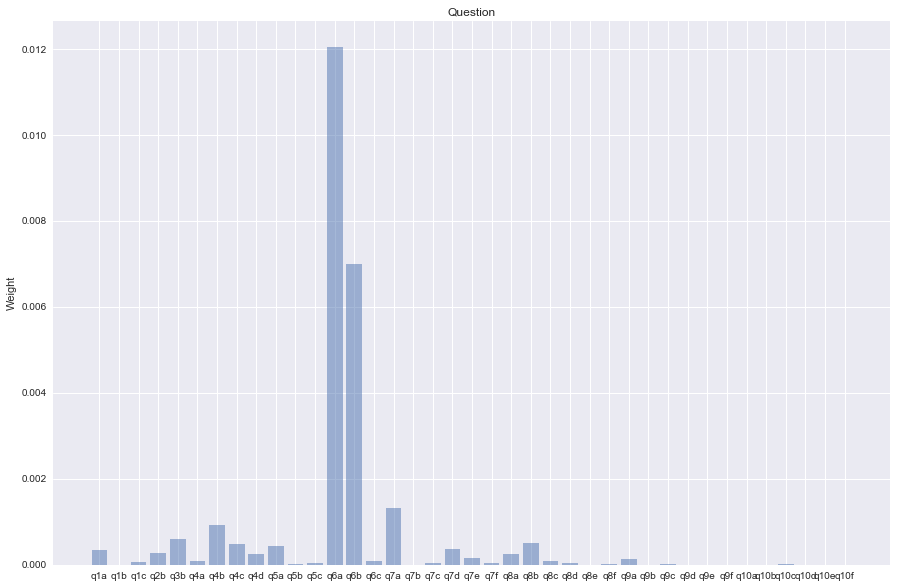

0.0984641919618


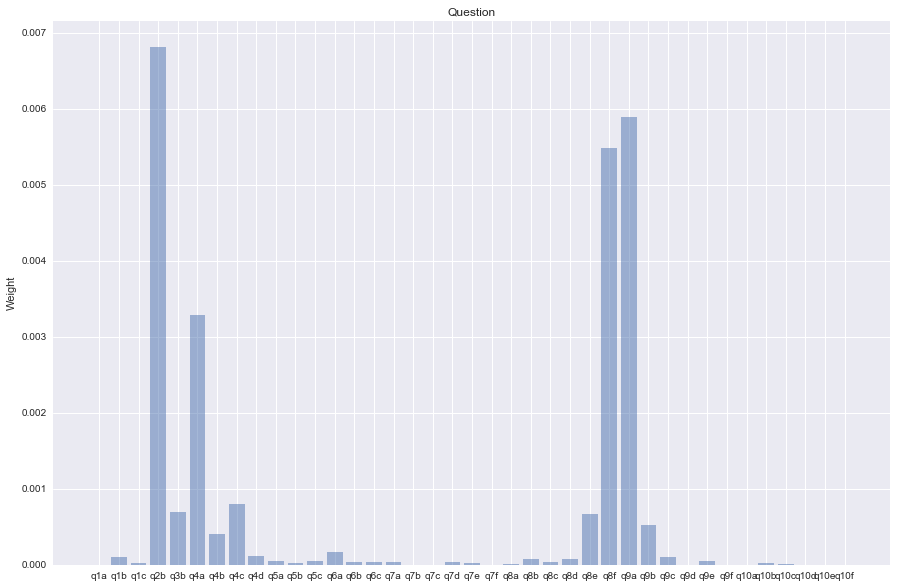

0.0767995285447


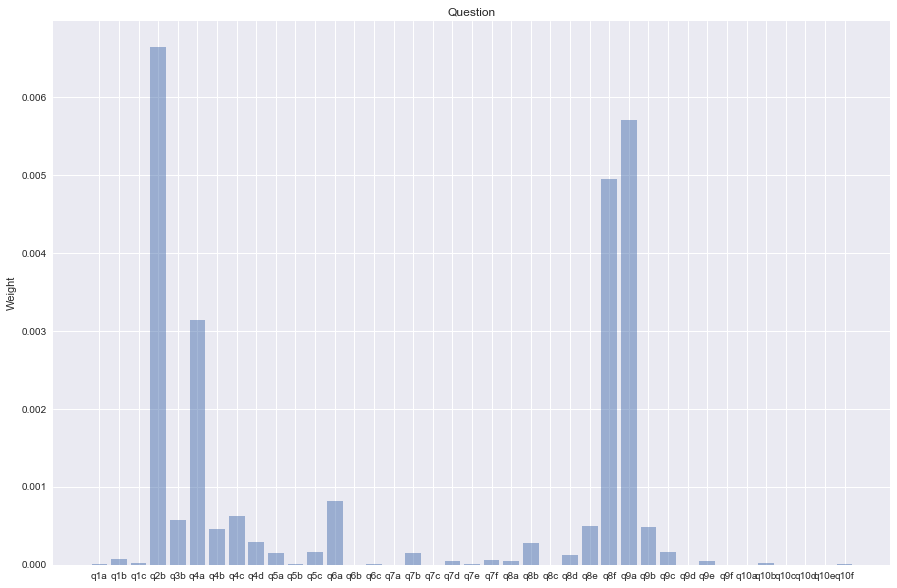

0.0471215152333


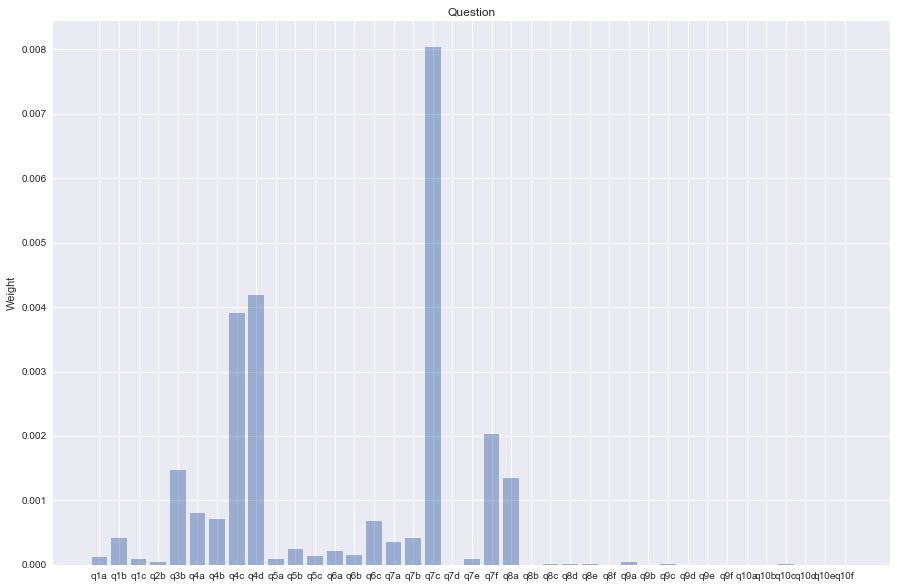

0.044083003857


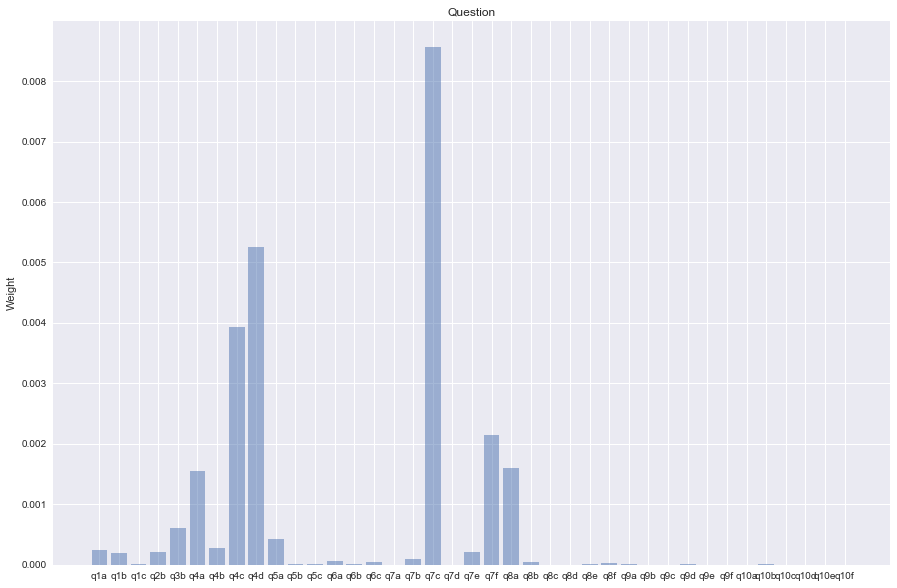

0.0386590322403


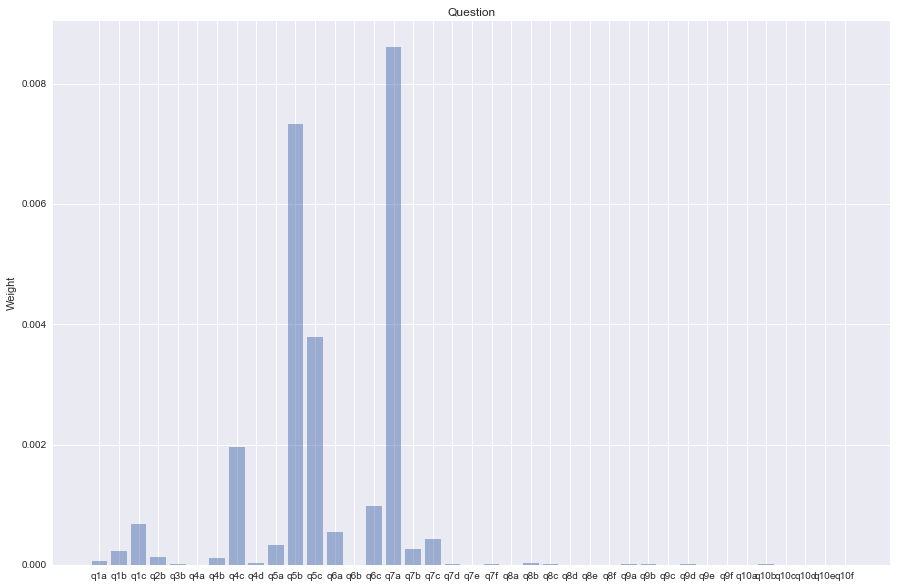

0.0346486656573


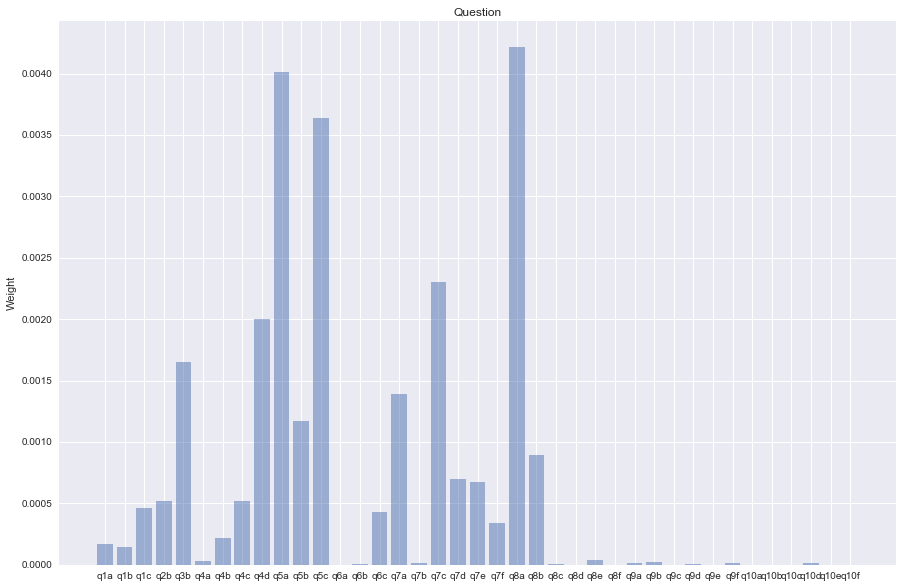

0.0317571526029


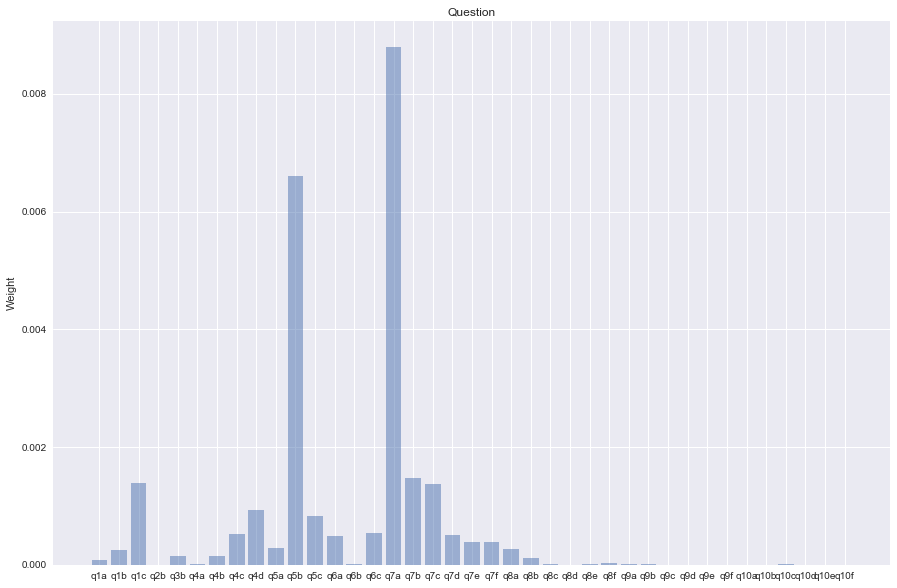

0.029599673934


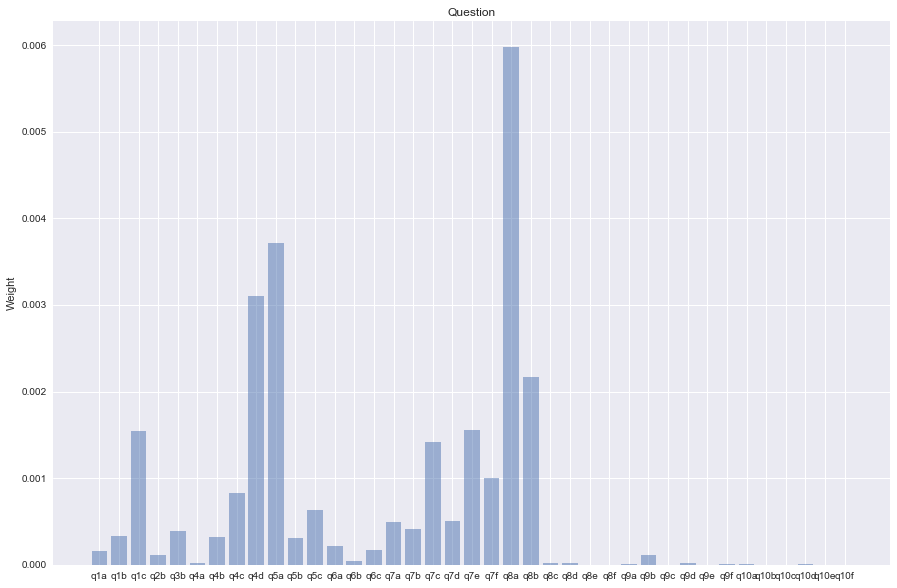

0.027534721636


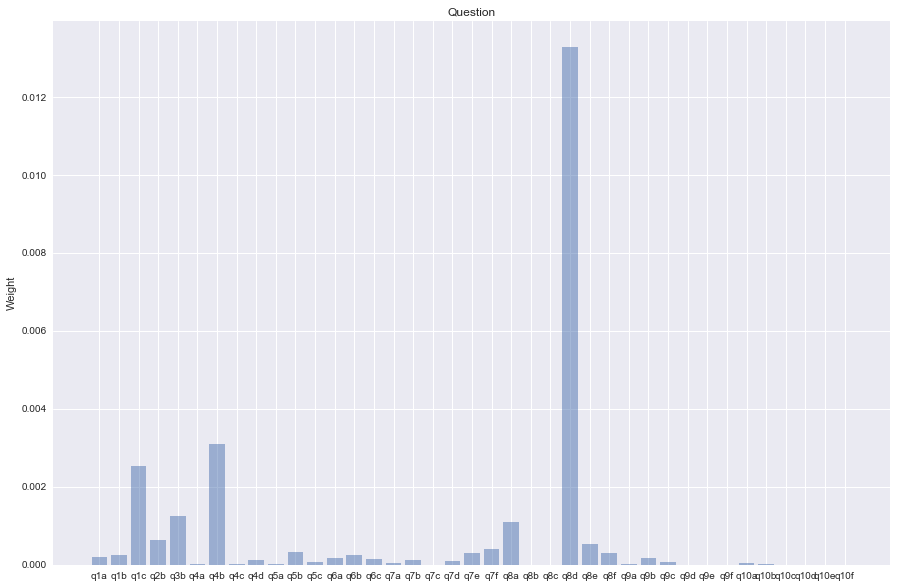

0.0261238291548


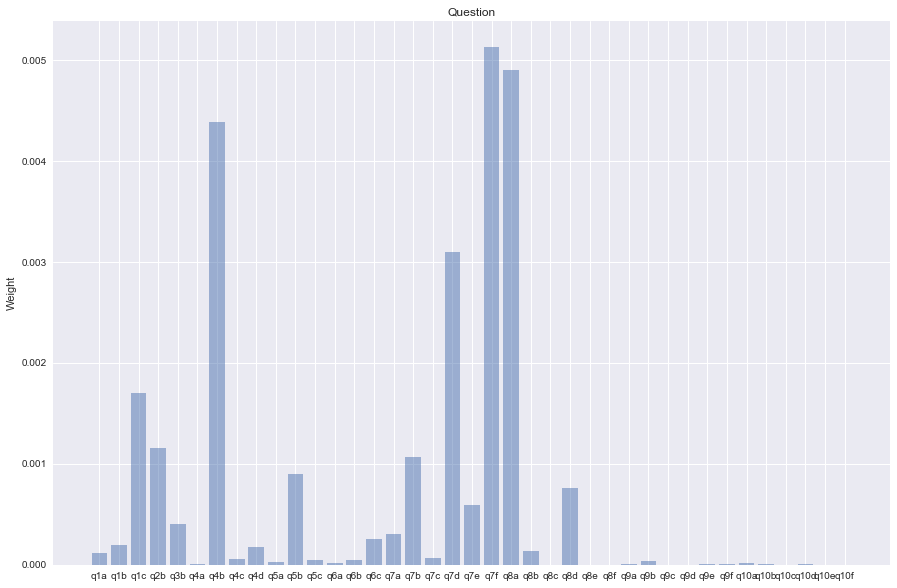

0.02417390584


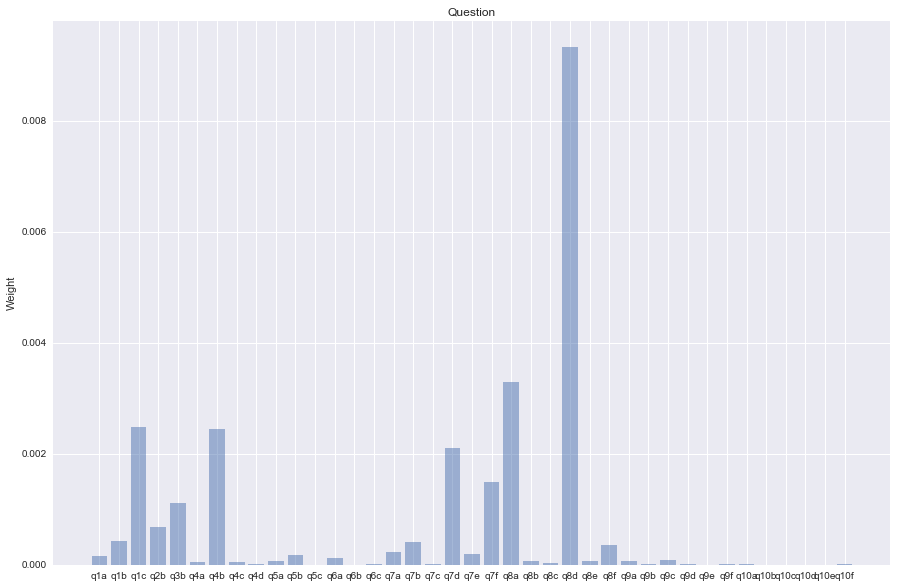

0.022379088608


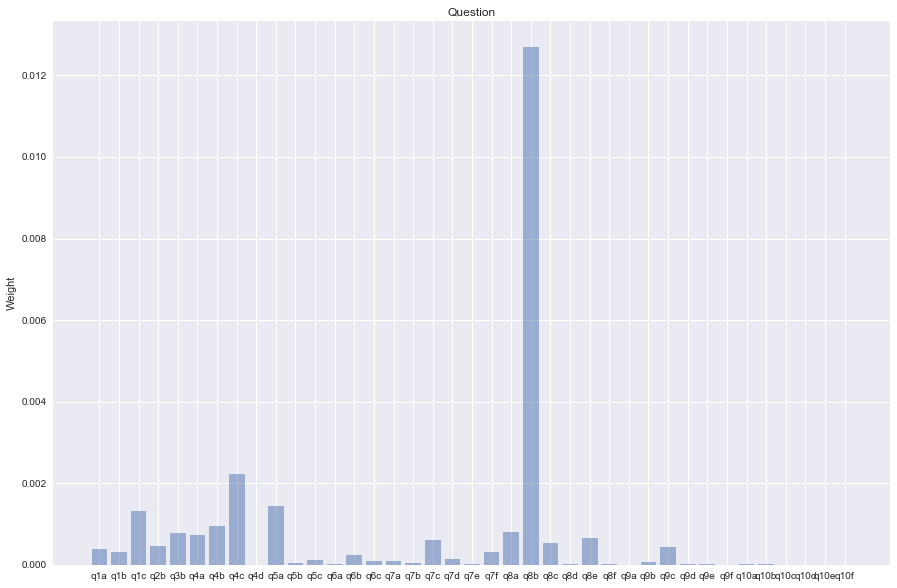

0.021188526234


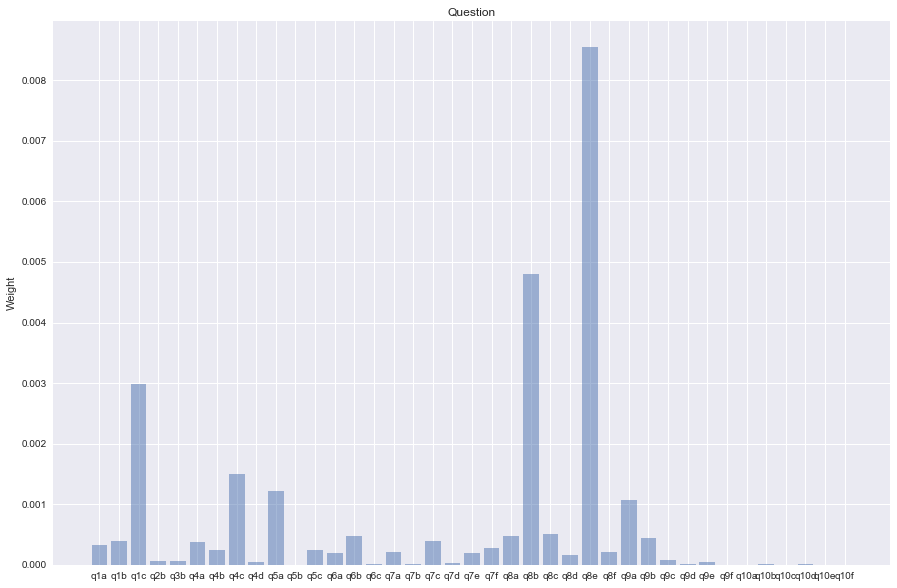

0.0197462469846


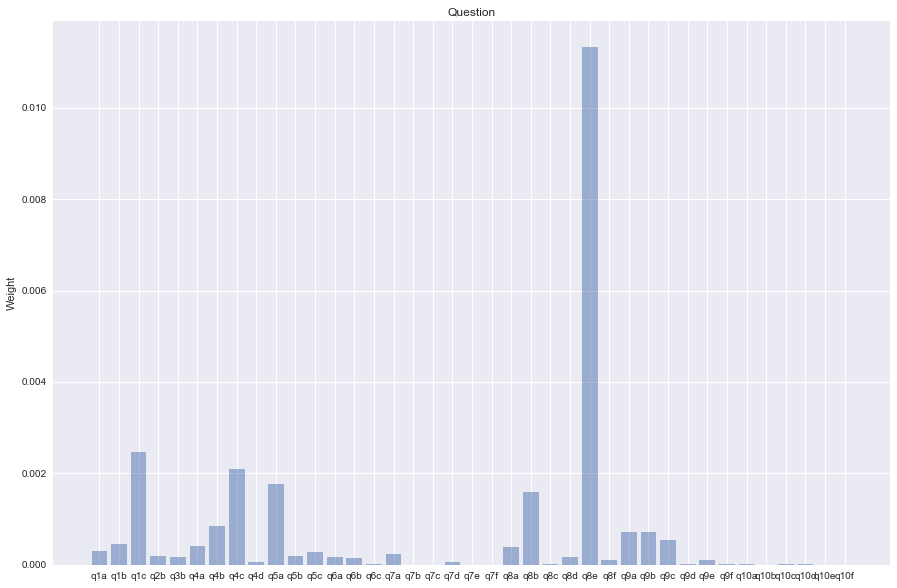

0.0184384578778


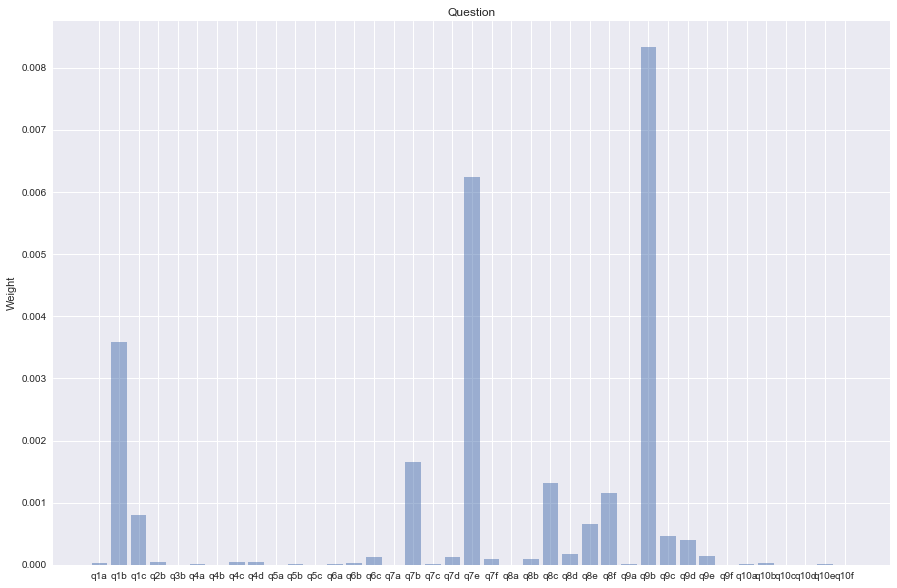

0.0161388338569


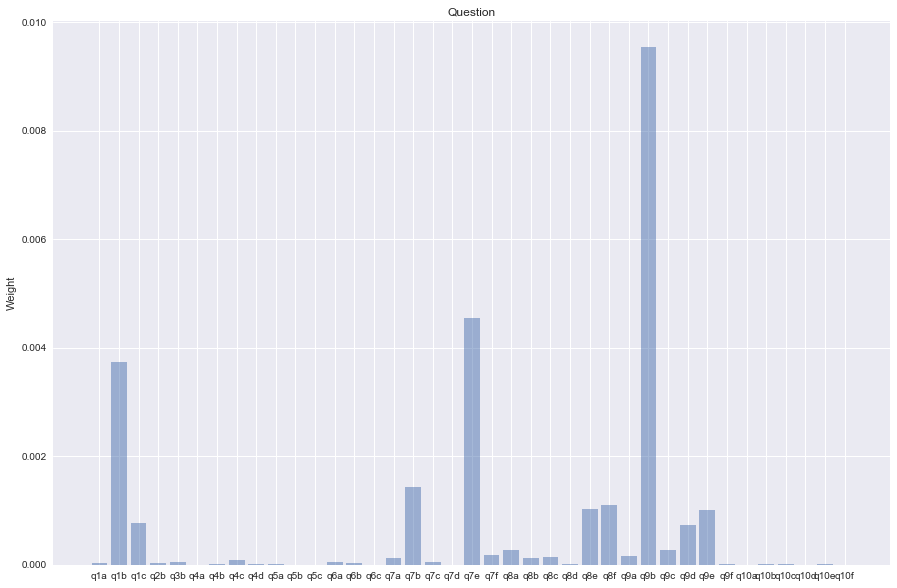

0.0145479984227


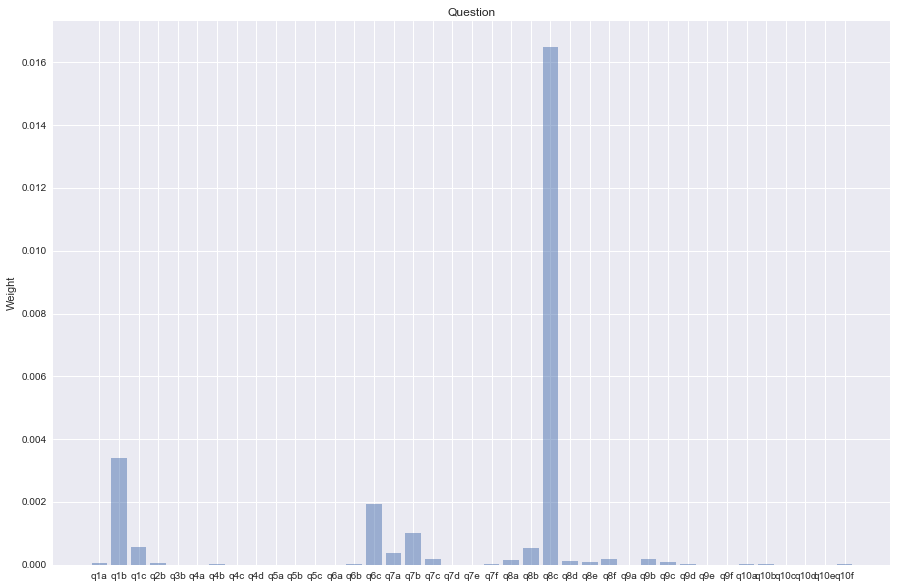

0.0140484658101


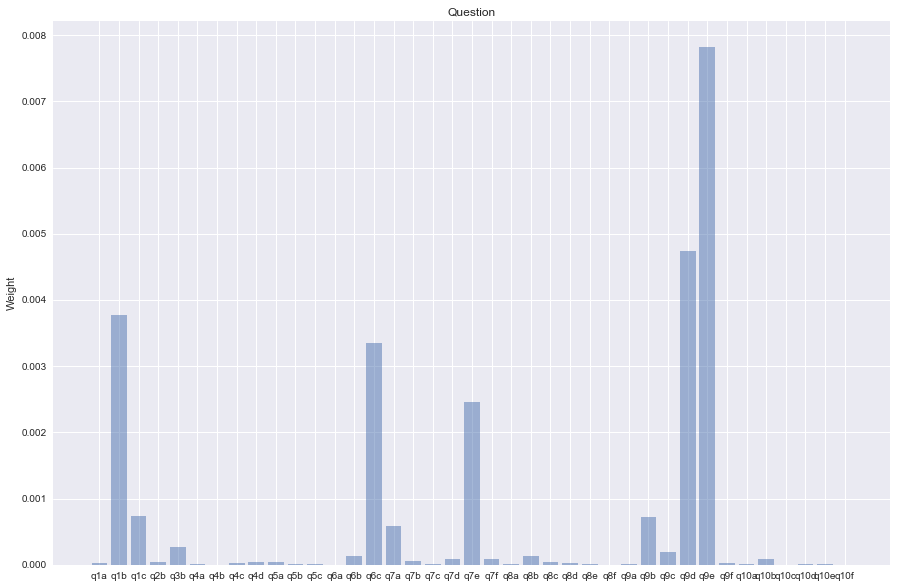

0.013750187629


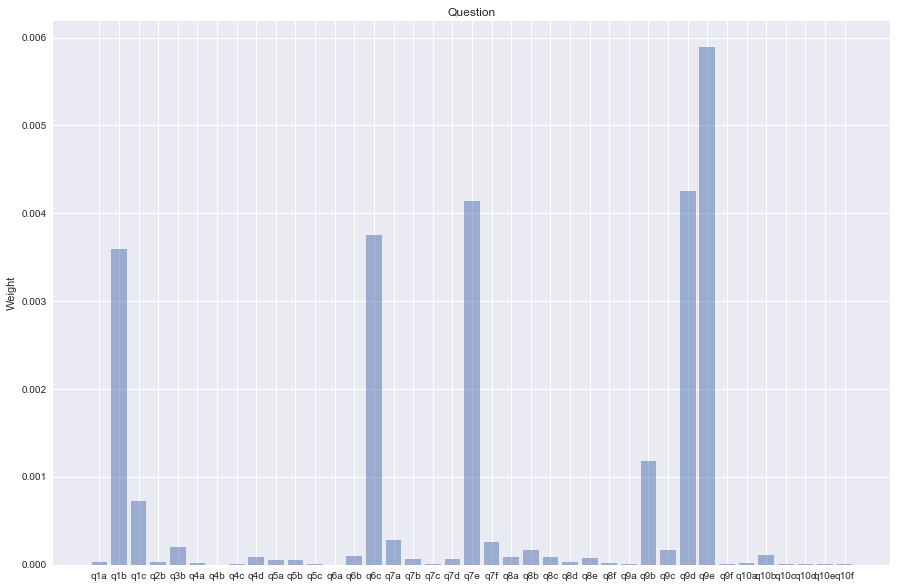

0.0135384015462


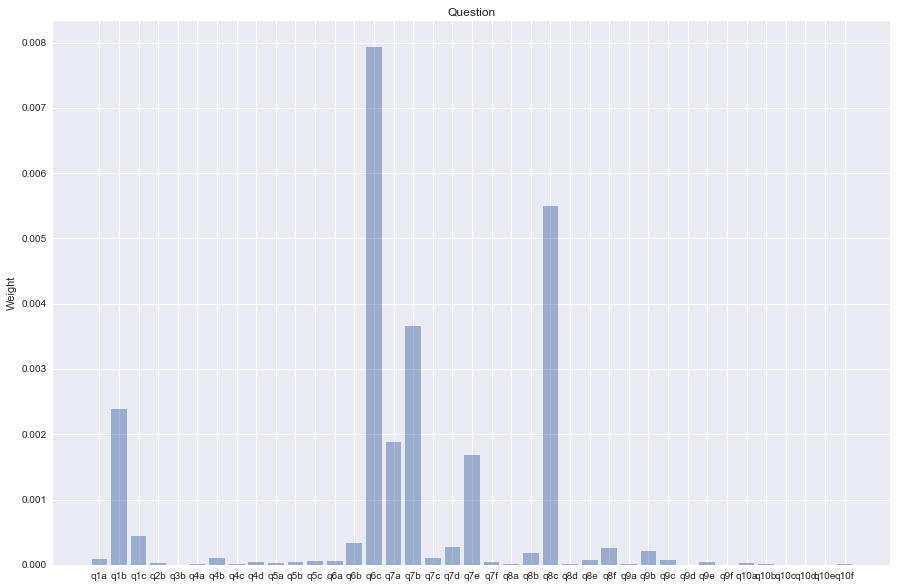

0.0128747339993


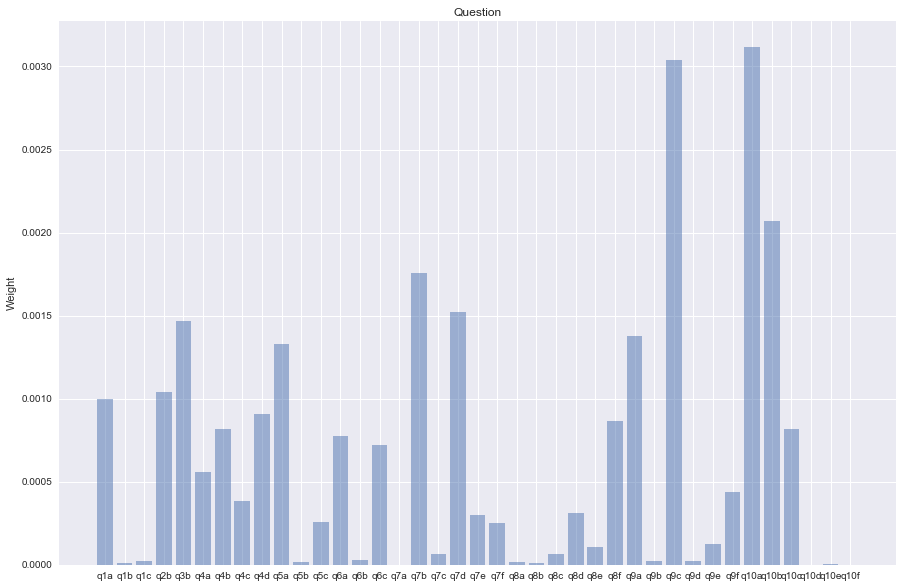

0.0118035455835


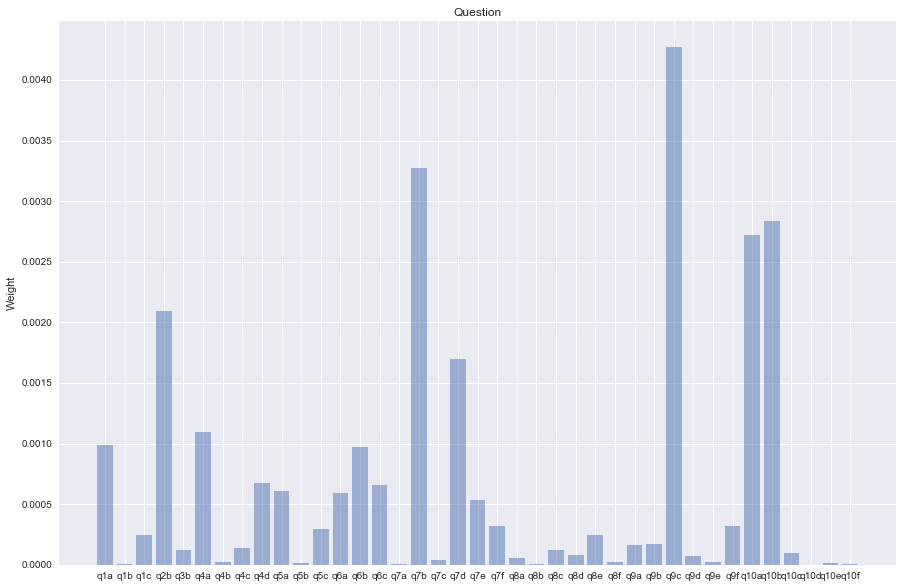

0.0110563150359


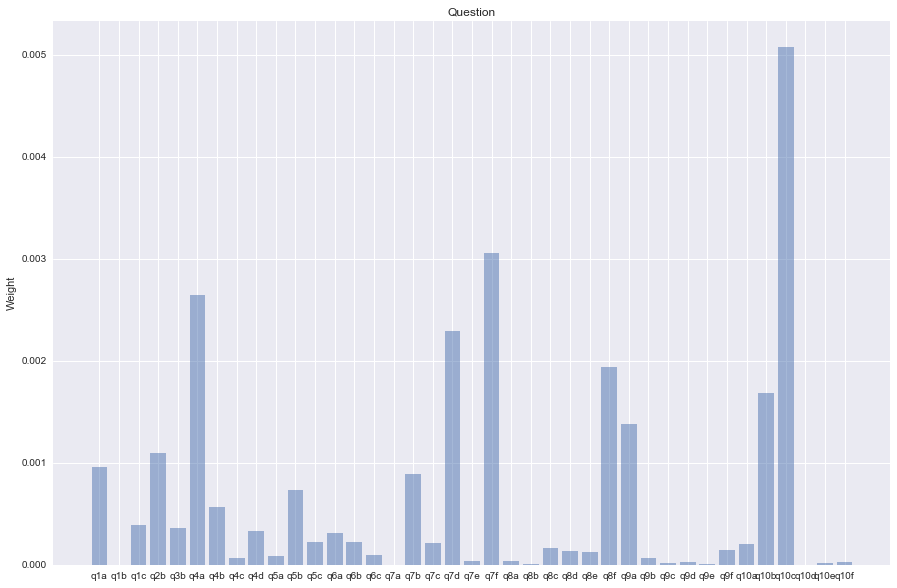

0.0102017612245


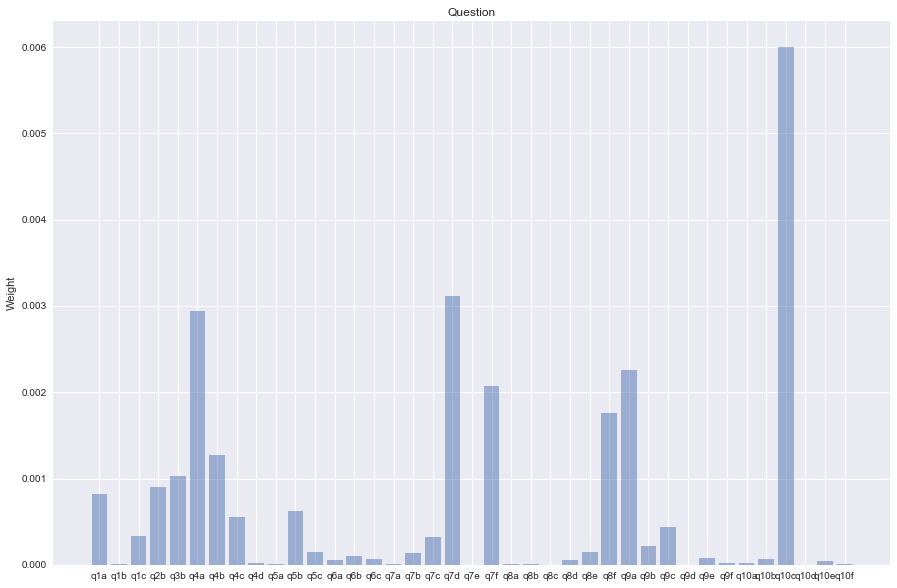

In [18]:
#check weights for each component

#normalize the v1
norm_v1t = normalize_v(v1.transpose())

#go through the numbe of dimensions that maintain threshhold and depict the column importance
for i in range(0, thresh_one):
    col = norm_v1t[i]
    
    print(norm_s1[i])
    plot_bar(col, section_one.columns)

Questions important in Section 1:

(a) 23.146% variance   
Question 6a: Please indicate your level of agreement (or disagreement) with the following statements - I feel connected to my local LGBT community.   

Question 6b: Please indicate your level of agreement (or disagreement) with the following statements - I feel that the probelms faced by the LGBT community are also my problems   

(b) 9.8% variance   
Question 2b: To what degree are LGBT organizations addressing your issues that you chose in question 2(a)?     

Question 8f: Thinking about LGBT groups, organizations and activities in general, during the past 12 months how often have you - donated money to an organization?    

Question 9a: Thinking about grounds, organizations and activities for people of color, during the past 12 months, how often have you - participated in political events?

### Section 2

In [19]:
section_two = pd.DataFrame([])

for i in range(cut_off, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype != 'object':
        section_two[df_map.columns[i]] = df_map[df_map.columns[i]]
    
    cut_off = cut_off + 1
    if df_map.columns[i] == 'q12d':
        break

In [22]:
sec2_scale = preprocessing.scale(section_two)

In [23]:
u2, s2, v2 = numpy.linalg.svd(sec2_scale)

In [24]:
norm_s2 = normalize_s(s2)

In [25]:
norm_s2

[0.48984958308546445,
 0.16339708004982967,
 0.10682542597158012,
 0.07529213813551458,
 0.056359336234528858,
 0.036394810353435926,
 0.02822005057832995,
 0.023820940312093853,
 0.019840635279222647]

In [26]:
# find 90% threshhold
thresh_two = 0
sum_two = 0
for i in range(0, len(norm_s2)):
    sum_two = sum_two + norm_s2[i]
    thresh_two = thresh_two + 1
    
    if sum_two >= 0.9:
        break

In [27]:
print(thresh_two, len(norm_s2))

6 9


0.489849583085


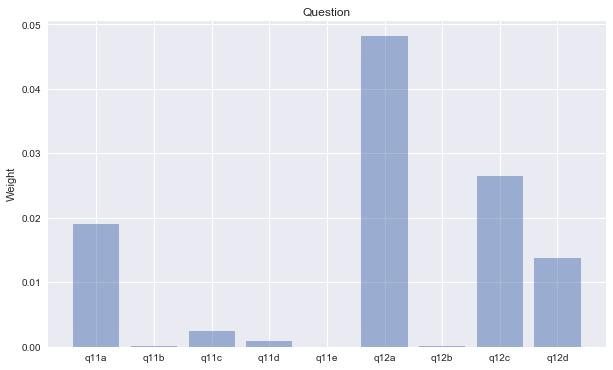

0.16339708005


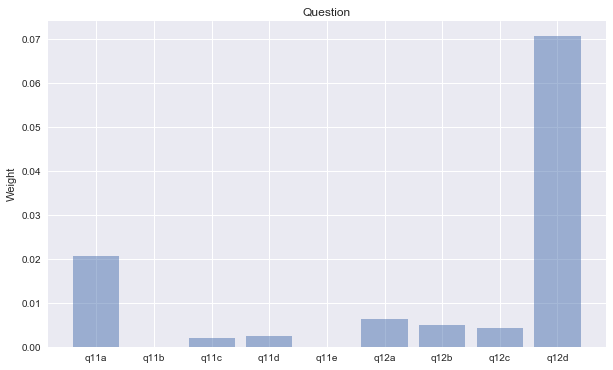

0.106825425972


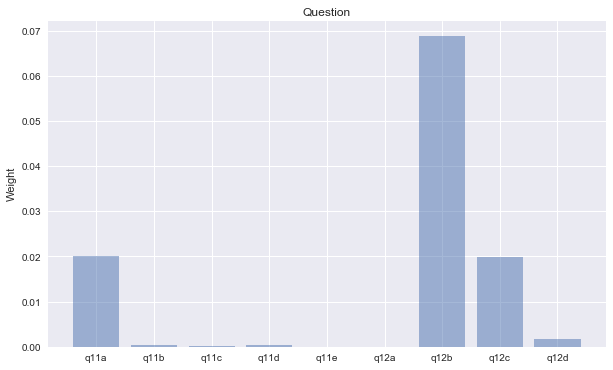

0.0752921381355


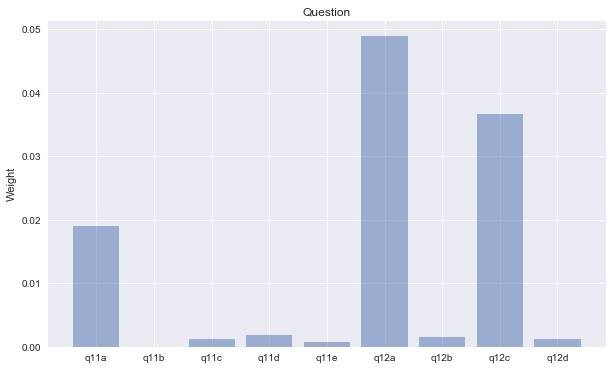

0.0563593362345


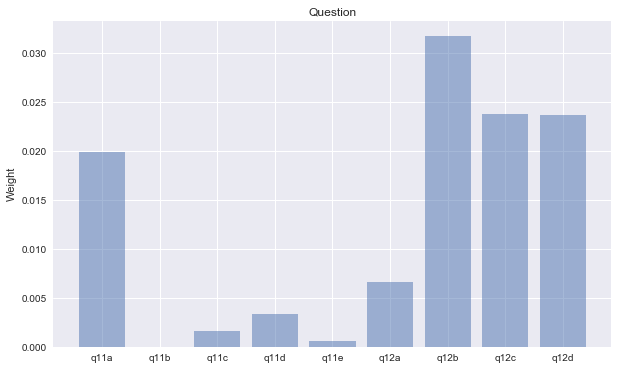

0.0363948103534


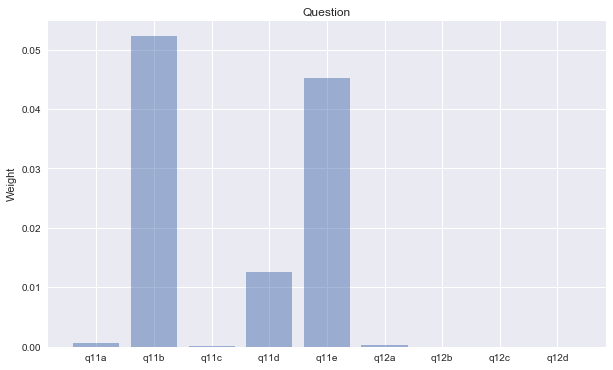

In [28]:
#check weights for each component

#normalize the v1
norm_v2t = normalize_v(v2.transpose())

#go through the numbe of dimensions that maintain threshhold and depict the column importance
for i in range(0, thresh_two):
    col = norm_v2t[i]
    
    print(norm_s2[i])
    plot_bar(col, section_two.columns, fig_size=(10,6))

Questions important in Section 1:

(a) 48.98% variance    

Question 12a: In what religious tradition were you raised?   

Question 12c: Thinking about your sexual identity, how much has your religious tradition or spiritual practice been a negative or positive influence for you in coming to terms with your LGBT identity?     

Question 11a: Please answer the following questions about your religious faith using the scale below. Indicate your level of agreement (or disagreement) for each statement - I pray daily?

(b) 16% variance   
Question 12d: How often do you attend religious service?

### Section 3

In [29]:
section_three = pd.DataFrame([])

for i in range(cut_off, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype != 'object':
        section_three[df_map.columns[i]] = df_map[df_map.columns[i]]
    
    cut_off = cut_off + 1
    if df_map.columns[i] == 'q16b':
        break

In [32]:
sec3_scale = preprocessing.scale(section_three)

In [33]:
u3, s3, v3 = numpy.linalg.svd(sec3_scale)

In [34]:
norm_s3 = normalize_s(s3)

In [35]:
norm_s3

[0.34162221418493588,
 0.16562067180027157,
 0.078100637424477731,
 0.076865056876580212,
 0.065627114311830756,
 0.057248424691035908,
 0.046853810499594015,
 0.039563188608162714,
 0.035260656175182349,
 0.028385033566134015,
 0.026556185127855202,
 0.023930793848010886,
 0.014366212885928908]

In [36]:
# find 90% threshhold
thresh_three = 0
sum_three = 0
for i in range(0, len(norm_s3)):
    sum_three = sum_three + norm_s3[i]
    thresh_three = thresh_three + 1
    
    if sum_three >= 0.9:
        break

In [37]:
print(thresh_three, len(norm_s3))

9 13


0.341622214185


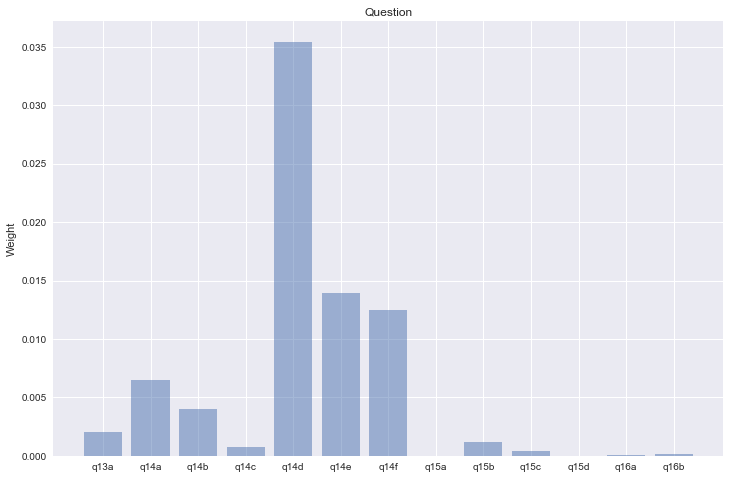

0.1656206718


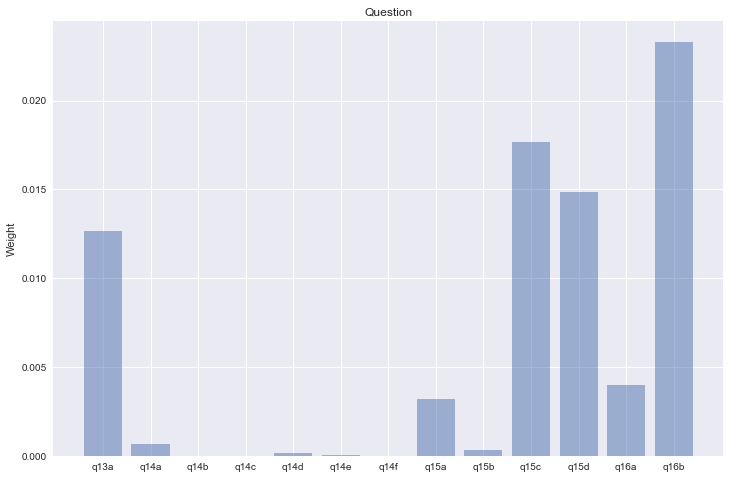

0.0781006374245


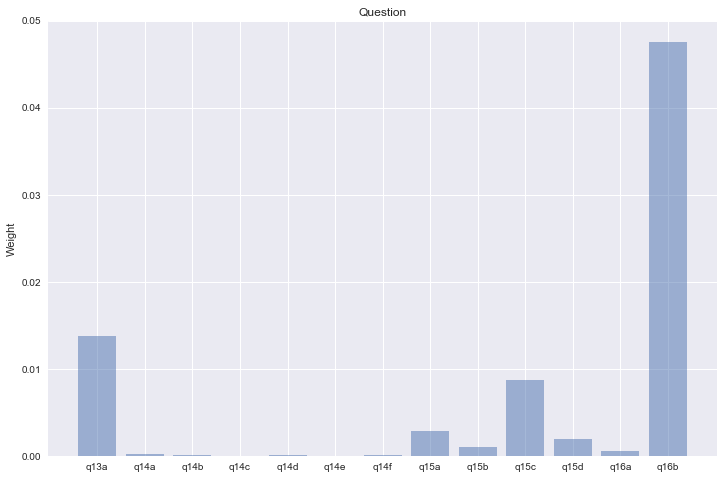

0.0768650568766


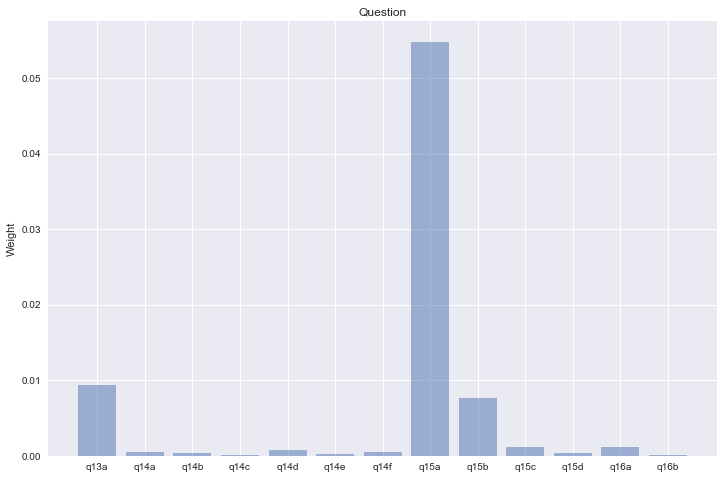

0.0656271143118


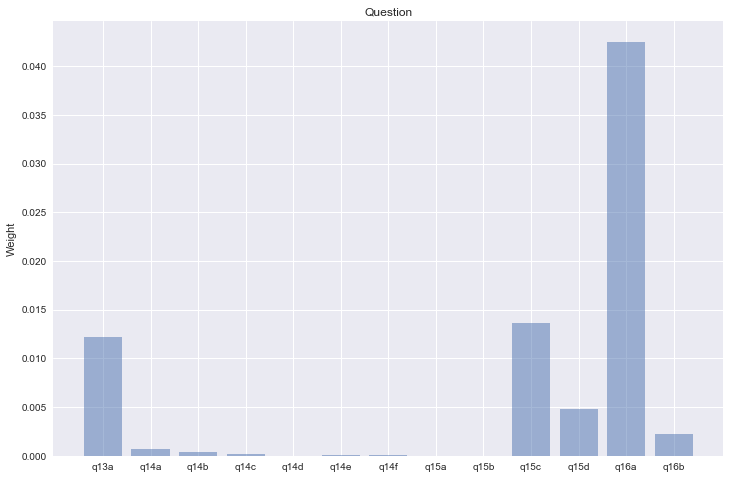

0.057248424691


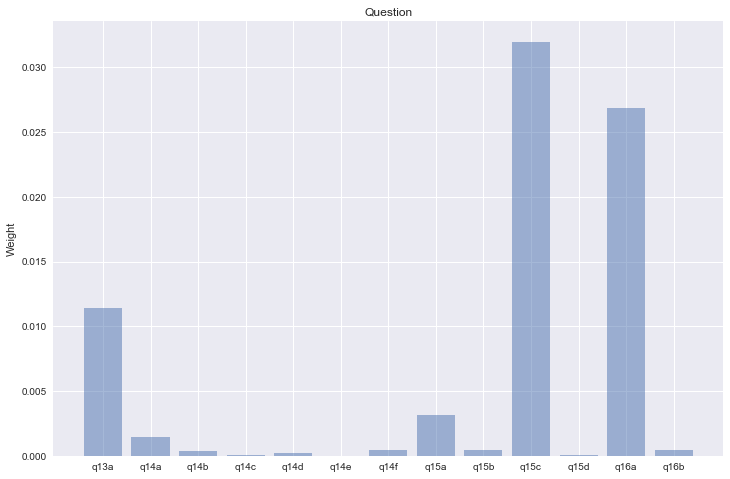

0.0468538104996


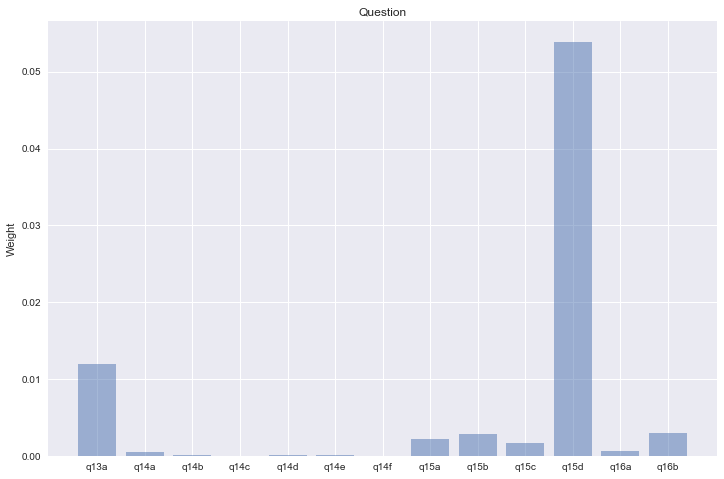

0.0395631886082


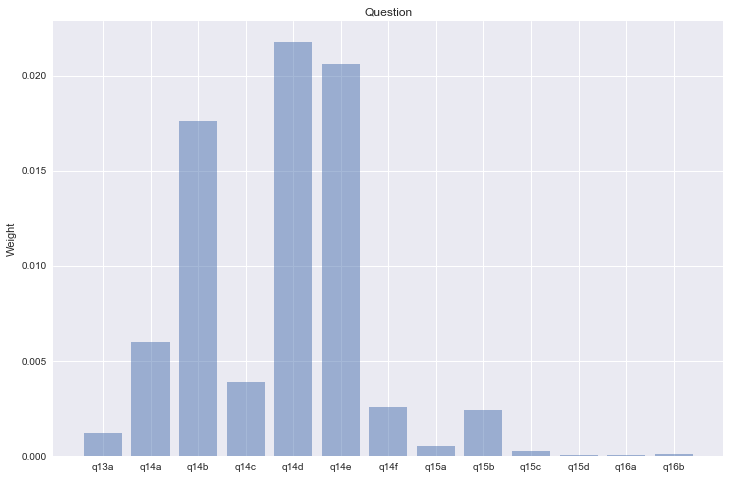

0.0352606561752


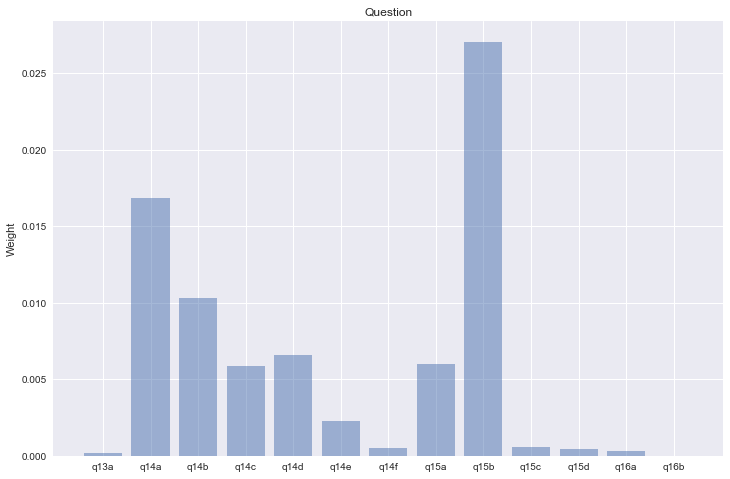

In [38]:
#check weights for each component

#normalize the v1
norm_v3t = normalize_v(v3.transpose())

#go through the numbe of dimensions that maintain threshhold and depict the column importance
for i in range(0, thresh_three):
    col = norm_v3t[i]
    
    print(norm_s3[i])
    plot_bar(col, section_three.columns, fig_size=(12,8))

Questions important in Section 3:

(a) 34.16% variance    
Question 14d: How many people within the following communities are you "out" to - co-worker?   

Question 14e: How many people within the following communities are you "out" to - people in neighborhood?   

Question 14f: How many people within the following communities are you "out" to - people online?   

(b) 16.56% variance   
Question 15c: How often have you felt uncomfortable in your racial or ehtnic community because of your sexual identity?   

Question 15d: How old were you when you first "came out" to yourself: that is, how old were you when you first knew you were "not straight"?   

Question 16b: Do you feel that your racial or ehtnic status is an important part of your identity?

### Section 4

In [39]:
section_four = pd.DataFrame([])

for i in range(cut_off, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype != 'object':
        section_four[df_map.columns[i]] = df_map[df_map.columns[i]]
    
    cut_off = cut_off + 1
    if df_map.columns[i] == 'q25':
        break

In [42]:
sec4_scale = preprocessing.scale(section_four)

In [43]:
u4, s4, v4 = numpy.linalg.svd(sec4_scale)

In [44]:
norm_s4 = normalize_s(s4)

In [45]:
norm_s4

[0.228175187413859,
 0.10089526186797299,
 0.086361598636266204,
 0.066152903520946577,
 0.05068385264368739,
 0.046104256989346497,
 0.041948166444140081,
 0.039433824214774177,
 0.038511117346001281,
 0.035638019326509215,
 0.033163831921674665,
 0.030445364002268414,
 0.029086314784550083,
 0.023269805923320352,
 0.022109756849735901,
 0.020428229450288309,
 0.020257057330954273,
 0.018494843969953274,
 0.014948286168551412,
 0.013069881542340773,
 0.010798927738052433,
 0.0098302481302294867,
 0.0092005738106311578,
 0.0067247848532711171,
 0.0042679051206748093]

In [46]:
# find 90% threshhold
thresh_four = 0
sum_four = 0
for i in range(0, len(norm_s4)):
    sum_four = sum_four + norm_s4[i]
    thresh_four = thresh_four + 1
    
    if sum_four >= 0.9:
        break

In [47]:
print(thresh_four, len(norm_s4))

17 25


0.228175187414


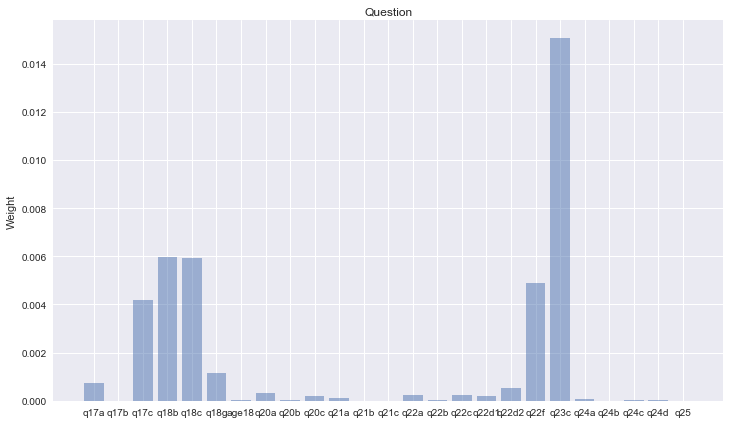

0.100895261868


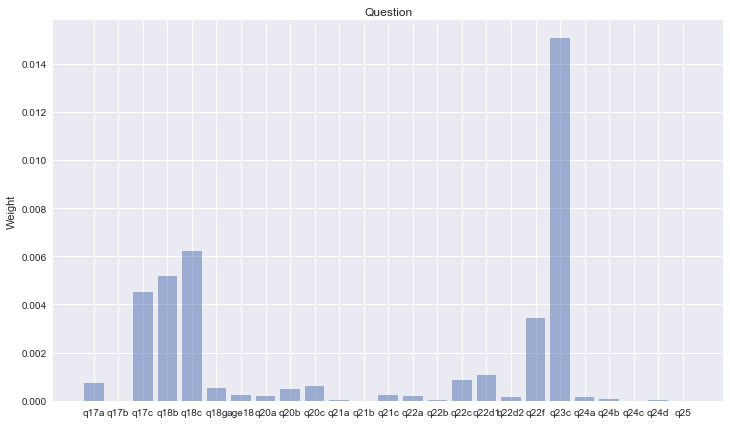

0.0863615986363


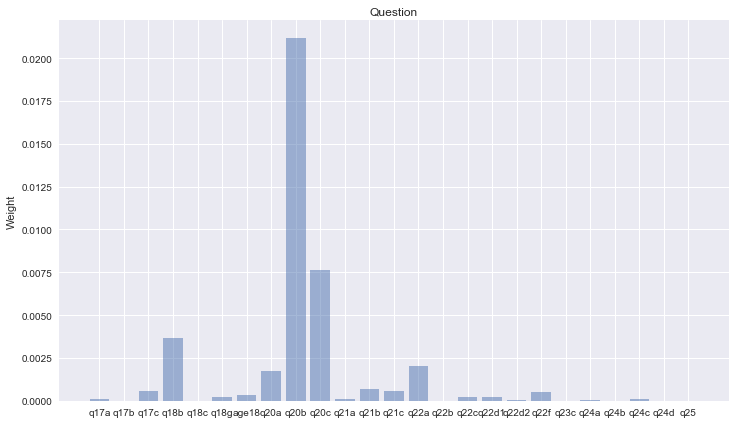

0.0661529035209


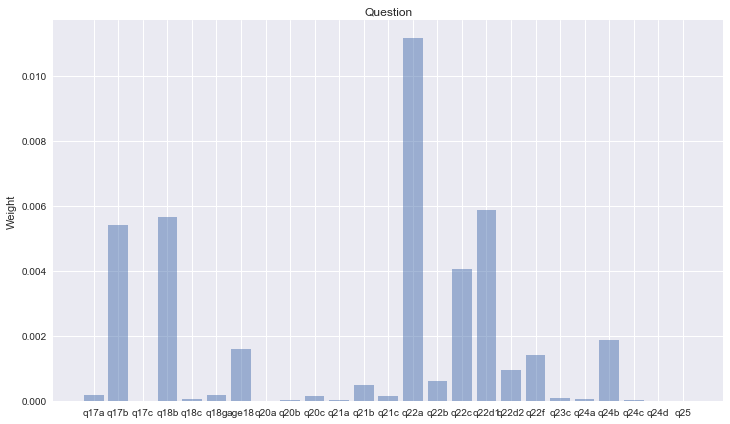

0.0506838526437


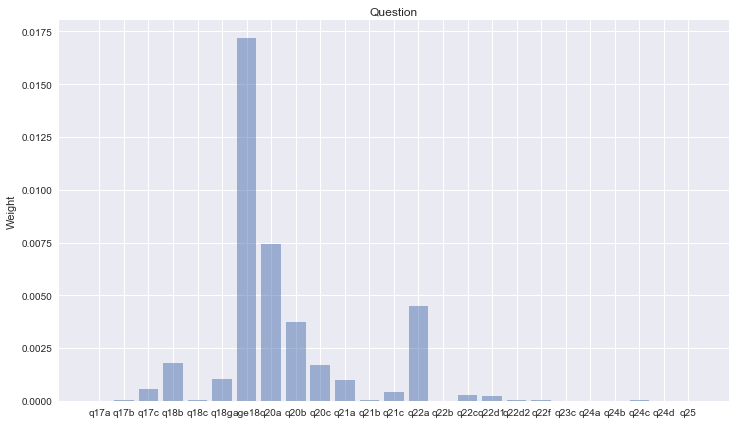

0.0461042569893


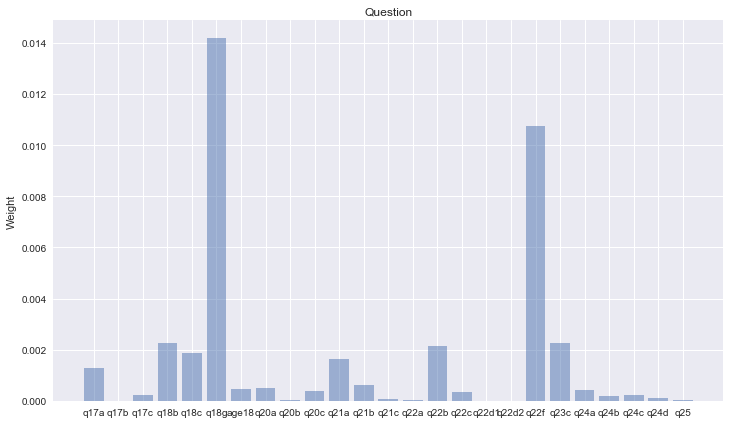

0.0419481664441


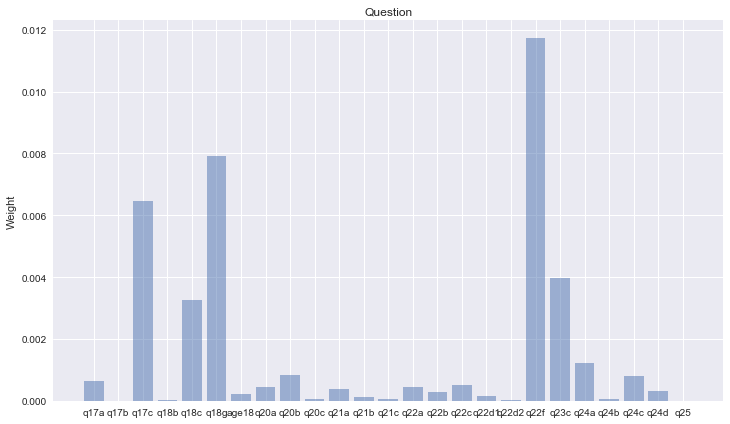

0.0394338242148


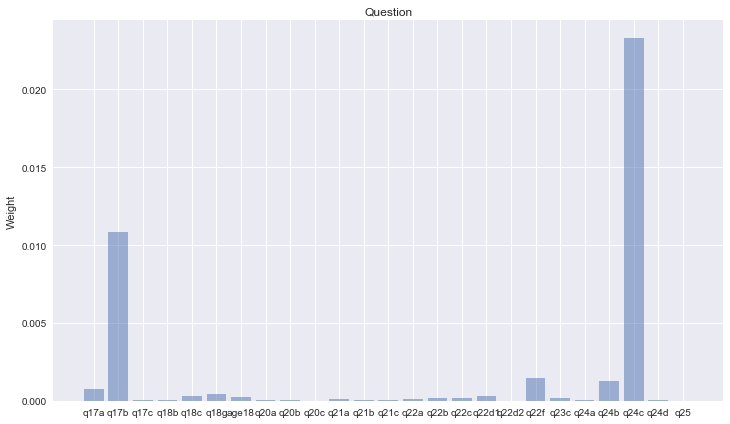

0.038511117346


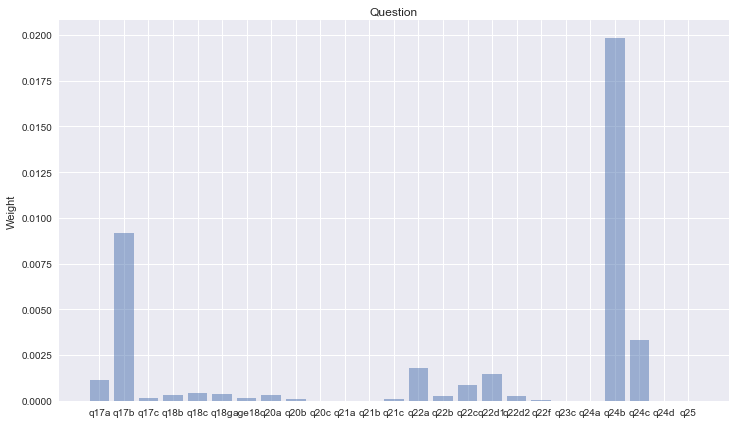

0.0356380193265


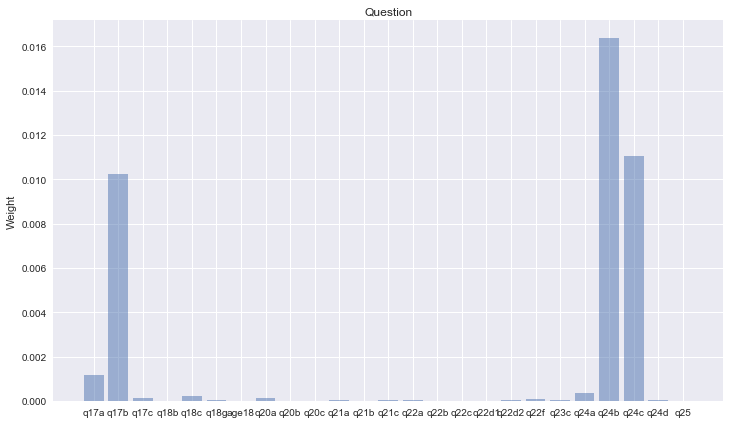

0.0331638319217


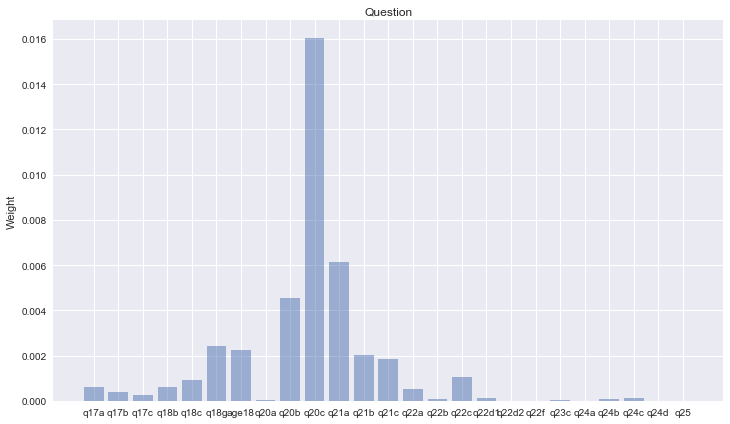

0.0304453640023


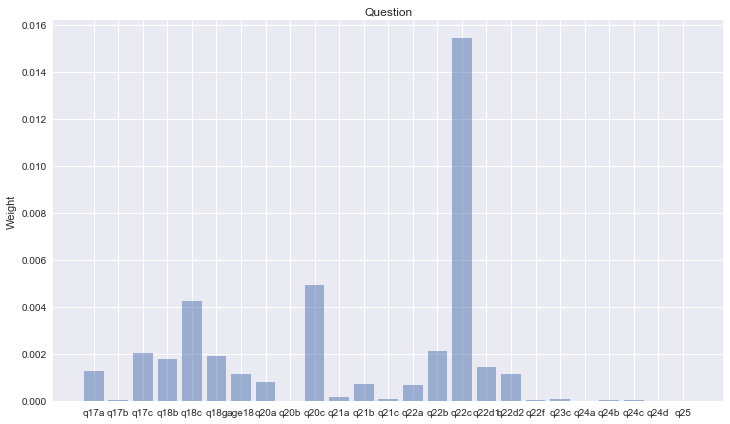

0.0290863147846


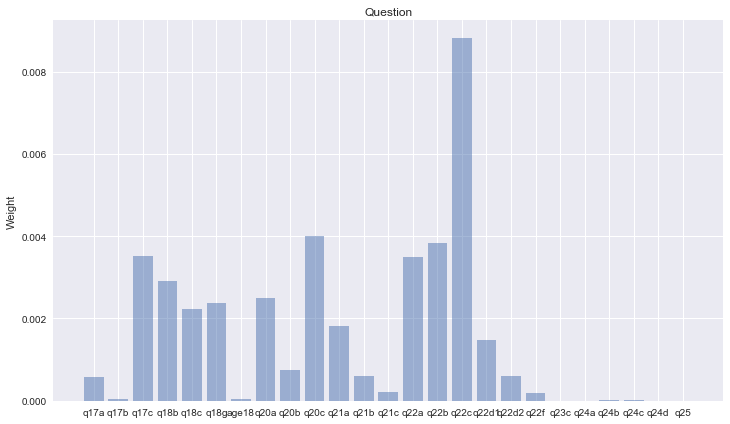

0.0232698059233


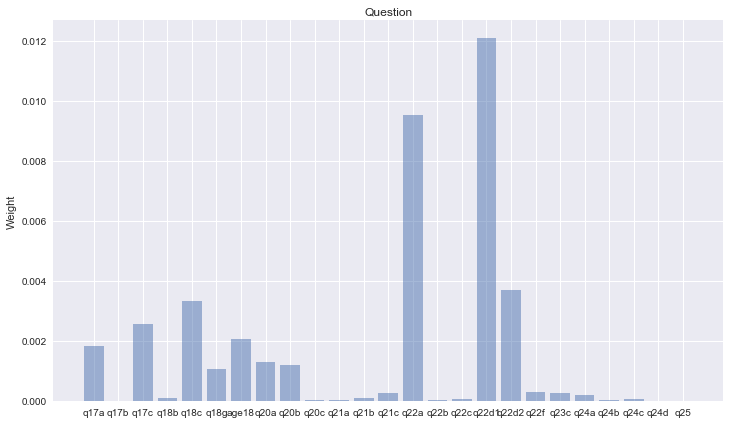

0.0221097568497


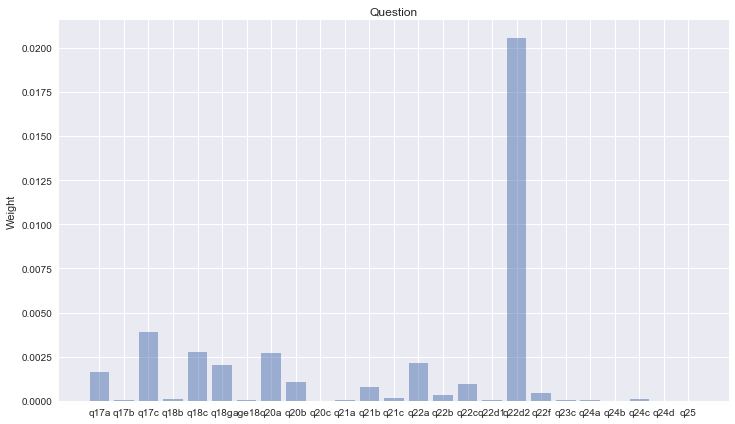

0.0204282294503


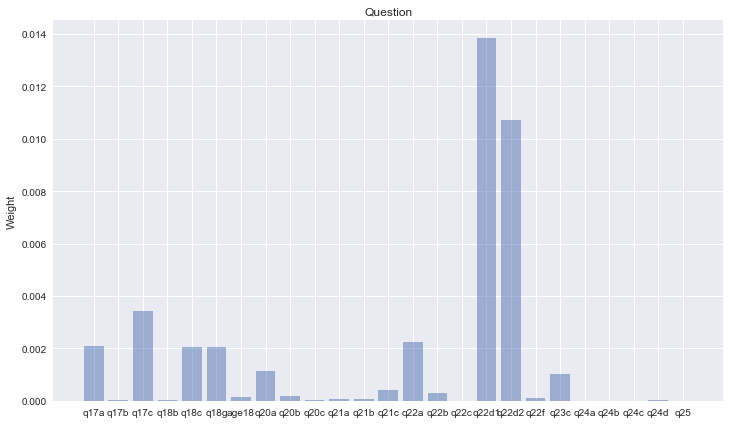

0.020257057331


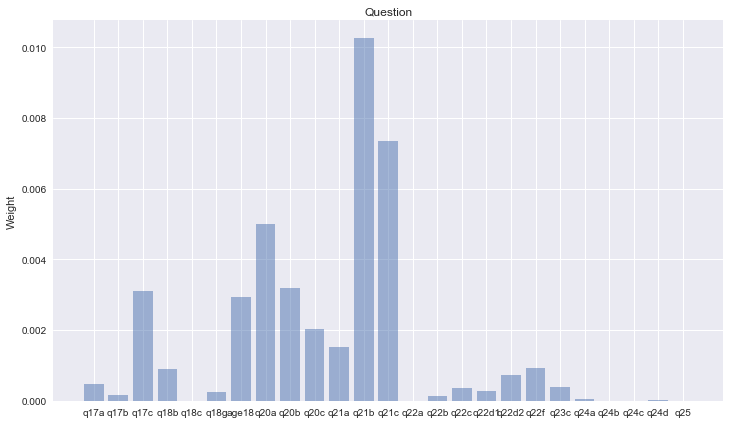

In [48]:
#check weights for each component

#normalize the v1
norm_v4t = normalize_v(v4.transpose())

#go through the numbe of dimensions that maintain threshhold and depict the column importance
for i in range(0, thresh_four):
    col = norm_v4t[i]
    
    print(norm_s4[i])
    plot_bar(col, section_four.columns, fig_size=(12,7))

In [54]:
all_sections = pd.concat([section_one, section_two, section_three, section_four], axis=1)
all_sections.to_csv(working_dir.joinpath('data/sections_all.csv'))

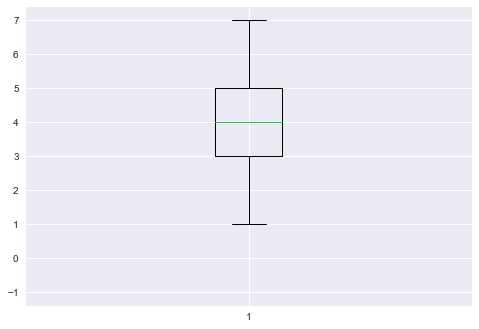

0.03308823529411765


In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(section_four['q22a'])
plt.show()
count = 0
for i in range(0, len(section_four['q22a'])):
    if section_four['q22a'].values[i] == 1:
        count = count + 1
print(count/(len(section_four)))